In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
coursera = pd.read_csv('coursera data.csv')
coursera.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5.3k
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17k
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130k
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91k
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320k


In [3]:
coursera.shape

(891, 7)

In [4]:
coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Unnamed: 0                  891 non-null int64
course_title                891 non-null object
course_organization         891 non-null object
course_Certificate_type     891 non-null object
course_rating               891 non-null float64
course_difficulty           891 non-null object
course_students_enrolled    891 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 48.8+ KB


In [5]:
coursera.describe(include = 'all')

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
count,891.000000,891,891,891,891.000000,891,891
unique,NaN,888,154,3,NaN,4,205
top,NaN,Developing Your Musicianship,University of Pennsylvania,COURSE,NaN,Beginner,120k
freq,NaN,2,59,582,NaN,487,22
mean,445.000000,NaN,NaN,NaN,4.677329,NaN,NaN
std,257.353842,NaN,NaN,NaN,0.162225,NaN,NaN
min,0.000000,NaN,NaN,NaN,3.300000,NaN,NaN
25%,222.500000,NaN,NaN,NaN,4.600000,NaN,NaN
50%,445.000000,NaN,NaN,NaN,4.700000,NaN,NaN
75%,667.500000,NaN,NaN,NaN,4.800000,NaN,NaN


In [6]:
coursera.isnull().sum()

Unnamed: 0                  0
course_title                0
course_organization         0
course_Certificate_type     0
course_rating               0
course_difficulty           0
course_students_enrolled    0
dtype: int64

In [7]:
coursera['course_students_enrolled'] = coursera['course_students_enrolled'].replace({'k': '*1e3', 'm': '*1e6'}, regex = True).map(pd.eval).astype(int)

In [8]:
coursera.head()

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,134,(ISC)² Systems Security Certified Practitioner...,(ISC)²,SPECIALIZATION,4.7,Beginner,5300
1,743,A Crash Course in Causality: Inferring Causal...,University of Pennsylvania,COURSE,4.7,Intermediate,17000
2,874,A Crash Course in Data Science,Johns Hopkins University,COURSE,4.5,Mixed,130000
3,413,A Law Student's Toolkit,Yale University,COURSE,4.7,Mixed,91000
4,635,A Life of Happiness and Fulfillment,Indian School of Business,COURSE,4.8,Mixed,320000


# what are the different coursera organisations,course title, course certificate types etc?

In [9]:
coursera['course_organization'].values

array(['(ISC)²', 'University of Pennsylvania', 'Johns Hopkins University',
       'Yale University', 'Indian School of Business',
       'University at Buffalo', 'deeplearning.ai', 'deeplearning.ai',
       'IBM', 'deeplearning.ai', 'deeplearning.ai', 'deeplearning.ai',
       'Amazon Web Services', 'Amazon Web Services',
       'Amazon Web Services', 'Amazon Web Services',
       'Amazon Web Services', 'University of Toronto',
       'University of California, Irvine',
       'University of Illinois at Urbana-Champaign', '(ISC)²',
       'University of Pennsylvania', 'University of Michigan',
       'University of Pennsylvania',
       'Universidad Nacional Autónoma de México', 'Yale University',
       'University of Colorado Boulder', 'IBM',
       'National Research University Higher School of Economics',
       'Google Cloud', 'Erasmus University Rotterdam', 'Duke University',
       'Yale University', 'University of Virginia',
       'University of Virginia', 'Atlassian', 'ScrumT

In [10]:
coursera['course_title'].values

array(['(ISC)² Systems Security Certified Practitioner (SSCP)',
       'A Crash Course in Causality:  Inferring Causal Effects from Observational Data',
       'A Crash Course in Data Science', "A Law Student's Toolkit",
       'A Life of Happiness and Fulfillment',
       'ADHD: Everyday Strategies for Elementary Students',
       'AI For Everyone', 'AI For Medical Treatment',
       'AI Foundations for Everyone', 'AI for Medical Diagnosis',
       'AI for Medical Prognosis', 'AI for Medicine', 'AWS Fundamentals',
       'AWS Fundamentals: Addressing Security Risk',
       'AWS Fundamentals: Building Serverless Applications',
       'AWS Fundamentals: Going Cloud-Native',
       'AWS Fundamentals: Migrating to the Cloud',
       'Aboriginal Worldviews and Education', 'Academic English: Writing',
       'Accelerated Computer Science Fundamentals', 'Access Controls',
       'Accounting Analytics', 'Accounting for Decision Making',
       'Achieving Personal and Professional Success',
  

In [11]:
coursera['course_Certificate_type'].value_counts()

COURSE                      582
SPECIALIZATION              297
PROFESSIONAL CERTIFICATE     12
Name: course_Certificate_type, dtype: int64

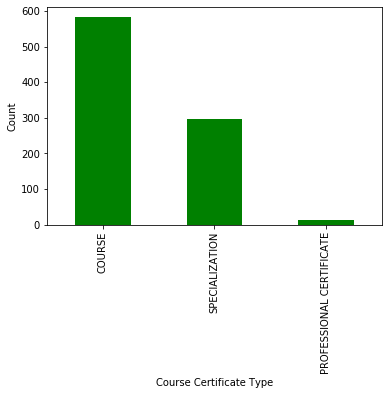

In [12]:
coursera['course_Certificate_type'].value_counts().plot(kind= 'bar', color = 'green')
plt.xlabel('Course Certificate Type')
plt.ylabel('Count')
plt.show()

# Is there any relation between no. of students enrolled and rating?

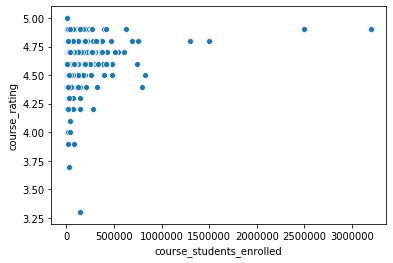

In [13]:
sns.scatterplot(x = 'course_students_enrolled', y = 'course_rating', data = coursera)

# Which course title has maximum number of student?

In [14]:
coursera.groupby('course_title').sum()['course_students_enrolled'].nlargest(1)

course_title
Machine Learning    3490000
Name: course_students_enrolled, dtype: int32

# Which organisation has minimum number of students?

In [15]:
coursera.groupby('course_title').sum()['course_students_enrolled'].nsmallest(1)

course_title
El Abogado del Futuro: Legaltech y la Transformación Digital del Derecho    1500
Name: course_students_enrolled, dtype: int32

# Is there any relation between number of students enrolled and course difficulty? if yes then name it.

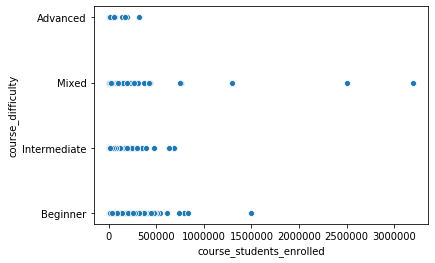

In [16]:
sns.scatterplot(x = 'course_students_enrolled', y = 'course_difficulty', data = coursera)

# Which course and organisation is best among all beginner?

In [17]:
course = coursera[(coursera['course_Certificate_type'] == 'COURSE') & (coursera['course_difficulty'] == 'Beginner')]

In [18]:
organization = course[(course.course_students_enrolled >= 4.5) & (course.course_students_enrolled >= 20000)]

In [19]:
organization.sort_values('course_students_enrolled').tail(1)

,Unnamed: 0,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
313,14,Financial Markets,Yale University,COURSE,4.8,Beginner,470000
